In [13]:
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import matplotlib as mpl
from matplotlib import pyplot as plt

from one.api import ONE
from psyfun import io, plots, atlas
from psyfun.config import paths, qc_datasets, cmaps

# Database query

In [14]:
# Instantiate database connection
one = ONE()

In [15]:
# Query the database for all sessions associated with this project
df_sessions = io.fetch_sessions(one, save=True)

 11%|█         | 5/45 [00:02<00:20,  1.93it/s]local md5 mismatch on dataset: mainenlab/Subjects/ZFM-08457/2025-03-20/001/raw_task_data_02/_iblrig_taskSettings.raw.json
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-20/001/raw_task_data_02/_iblrig_taskSettings.raw.json: 100%|██████████| 4.00k/4.00k [00:00<00:00, 9.85kB/s]
local md5 mismatch on dataset: mainenlab/Subjects/ZFM-08457/2025-03-20/001/raw_task_data_02/_iblrig_stimPositionScreen.raw.csv
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-20/001/raw_task_data_02/_iblrig_stimPositionScreen.raw.csv: 100%|██████████| 22.3k/22.3k [00:00<00:00, 61.0kB/s]
  0%|          | 0/45 [00:00<?, ?it/s]/home/openlab/Desktop/Jaime/Code/psychedelics/psyfun/io.py:302: UserWarning: No entries in 'recordings.csv' for 9f420fcf-bc94-458b-afa0-c64b626e7764
  warnings.warn(f"No entries in 'recordings.csv' for {series['eid']}")
/home/openlab/Desktop/Ja

In [22]:
df_sessions

,LSD_admin,alf/probe00/pykilosort/spikes.times.npy,alf/probe01/pykilosort/spikes.times.npy,alf/task_00/_ibl_passivePeriods.intervalsTable.csv,alf/task_01/_ibl_passivePeriods.intervalsTable.csv,alf/task_02/_ibl_passivePeriods.intervalsTable.csv,eid,lab,n_probes,n_tasks,...,videoRight_focus_qc,videoRight_framerate,videoRight_framerate_qc,videoRight_pin_state_qc,videoRight_position_qc,videoRight_qc,videoRight_resolution_qc,videoRight_timestamps_qc,videoRight_wheel_alignment_qc,session_n
0,1095.0,False,True,True,False,NaN,58ca39c5-e27f-43c4-8516-2ccc4fe88042,mainenlab,2,2,...,PASS,150.769,PASS,PASS,PASS,PASS,PASS,PASS,PASS,1
1,1065.0,True,True,True,True,NaN,7149e0fc-a52d-4e93-849c-edc22d54e7a5,mainenlab,2,2,...,PASS,150.769,PASS,PASS,PASS,PASS,PASS,PASS,PASS,2
2,1073.0,True,NaN,True,True,NaN,debe9833-5c26-4d9e-89ba-c63e07e1db10,mainenlab,1,2,...,PASS,150.769,PASS,PASS,PASS,PASS,PASS,PASS,PASS,3
3,1200.0,True,False,True,NaN,NaN,1bc4aea6-c6fa-4cb8-882f-ea1cc4a12667,mainenlab,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1173.0,True,True,True,True,NaN,996f3585-b804-4a3d-878a-1c15d708962b,mainenlab,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,1095.0,True,True,True,NaN,NaN,98317b26-72d6-4805-9a68-beb7d37f955c,mainenlab,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,1100.0,True,True,True,True,NaN,2583567d-cd2a-485a-8d79-85aa619e1ce2,mainenlab,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
7,1221.0,False,True,True,NaN,NaN,547a8c9a-be6b-4306-8a9a-c154096693ff,mainenlab,2,1,...,PASS,150.769,PASS,PASS,PASS,PASS,PASS,PASS,PASS,1
8,1063.0,True,True,True,False,NaN,8dfd9963-25e5-4f63-8f91-5b27a5852628,mainenlab,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,1088.0,True,True,True,NaN,NaN,a1d9a3a6-873c-47fe-9350-6c87876a5669,mainenlab,2,1,...,PASS,150.769,PASS,PASS,PASS,PASS,PASS,PASS,PASS,3


In [17]:
# Query the database for all probe insertions associated with this project
df_insertions = io.fetch_insertions(one, save=True)

100%|██████████| 78/78 [00:05<00:00, 13.35it/s]


In [23]:
df_insertions

,pid,eid,model,session_info,probe,json,serial,auto_datetime,chronic_insertion,datasets,...,start_time,ephys_qc,n_units,n_units_qc_pass,firing_rate_median,firing_rate_max,tracing_qc,alignment_qc,histology_qc,session_n
0,427e2314-0f58-4d4e-809d-80dd1225176c,58ca39c5-e27f-43c4-8516-2ccc4fe88042,3B2,"{'subject': 'SQL-15020', 'start_time': '2023-0...",probe00,"{'qc': 'NOT_SET', 'xyz_picks': [[-2063, -1349,...",1.800512e+10,2023-07-12T15:08:01.065693,NaN,"['2b47af94-7e08-4992-b97e-04da05e693a1', '3049...",...,2023-03-21T11:45:48.885186,NOT_SET,NaN,NaN,NaN,NaN,NOT SET,NOT SET,NOT_SET,1
1,3120f1bd-ed5f-4877-bdc4-3449d5869d77,58ca39c5-e27f-43c4-8516-2ccc4fe88042,3B2,"{'subject': 'SQL-15020', 'start_time': '2023-0...",probe01,"{'qc': 'NOT_SET', 'extended_qc': {'apRms_p10_r...",1.840840e+10,2023-04-04T16:40:55.445157,NaN,"['663bc5b4-cb0d-45b4-962b-5578ac2abb3a', 'b315...",...,2023-03-21T11:45:48.885186,NOT_SET,NaN,NaN,NaN,NaN,NOT SET,NOT SET,NOT_SET,1
2,0d8aef21-2ac3-4b30-9b9c-0e1627136b9e,7149e0fc-a52d-4e93-849c-edc22d54e7a5,3B2,"{'subject': 'SQL-15020', 'start_time': '2023-0...",probe00,"{'qc': 'PASS', 'n_units': 1592, 'xyz_picks': [...",1.840840e+10,2024-01-29T11:41:48.781131,NaN,"['25832e21-ec2b-40d5-ba52-14a4774b874a', '73e8...",...,2023-03-28T12:16:34.328991,PASS,1592.0,58.0,3.59,15.86,NOT SET,PASS,NOT_SET,2
3,61d2d753-9f7c-4b10-8d57-29d8735c23e9,7149e0fc-a52d-4e93-849c-edc22d54e7a5,3B2,"{'subject': 'SQL-15020', 'start_time': '2023-0...",probe01,"{'qc': 'PASS', 'n_units': 1571, 'xyz_picks': [...",1.800512e+10,2024-01-29T11:42:00.527507,NaN,"['98b69eaa-8464-4178-9f1e-fbab432db31b', '7502...",...,2023-03-28T12:16:34.328991,PASS,1571.0,31.0,4.28,26.18,NOT SET,PASS,NOT_SET,2
4,40eb6578-f2f6-4acc-aa8e-527248d2a7bc,debe9833-5c26-4d9e-89ba-c63e07e1db10,3B2,"{'subject': 'SQL-15020', 'start_time': '2023-0...",probe00,"{'qc': 'PASS', 'n_units': 1600, 'xyz_picks': [...",1.800512e+10,2024-01-29T11:41:37.073649,NaN,"['a839a1cf-2c76-47a6-b2f9-92e1fd0abd23', '6af6...",...,2023-04-04T11:26:16.745718,PASS,1600.0,32.0,3.47,39.82,NOT SET,PASS,NOT_SET,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,ee936469-7364-49cf-88f7-7e0357dbd34e,bb0e0ad2-4c98-4c98-b92f-559683e8a6f3,3B2,"{'subject': 'ZFM-08631', 'start_time': '2025-0...",probe01,"{'qc': 'NOT_SET', 'n_units': 537, 'extended_qc...",1.800512e+10,2025-03-24T06:14:39.212634,NaN,"['5365d726-34bf-4695-961e-75f30dbbe601', '32dd...",...,2025-03-12T18:44:54.059563,NOT_SET,537.0,27.0,3.03,23.86,NOT SET,NOT SET,NaN,1
74,66cda3a0-da53-48ca-b4ba-a25e8a9d69c4,58c61f29-d4e6-4ca7-b6de-bd860e83fe4e,3B2,"{'subject': 'ZFM-08631', 'start_time': '2025-0...",probe00,"{'qc': 'NOT_SET', 'n_units': 545, 'extended_qc...",2.009791e+10,2025-03-23T10:14:26.483550,NaN,"['d76cc08a-d3fa-4ad9-8d34-af2d3d11d6fe', '86d1...",...,2025-03-18T13:26:38.102722,NOT_SET,545.0,100.0,2.74,37.92,NOT SET,NOT SET,NaN,2
75,a978ab2d-5b91-47b4-99f9-26680d65fe3e,58c61f29-d4e6-4ca7-b6de-bd860e83fe4e,3B2,"{'subject': 'ZFM-08631', 'start_time': '2025-0...",probe01,"{'qc': 'NOT_SET', 'n_units': 812, 'extended_qc...",2.009791e+10,2025-03-20T22:08:14.257867,NaN,"['deaa17a4-83c7-4504-abab-afa42432e565', '1d85...",...,2025-03-18T13:26:38.102722,NOT_SET,812.0,206.0,8.89,170.56,NOT SET,NOT SET,NaN,2
76,1033cb7a-67ad-440d-b34e-3aba8655ebb7,cdc1965e-4324-422a-a9d4-86b4e5d0de92,3B2,"{'subject': 'ZFM-08631', 'start_time': '2025-0...",probe01,"{'qc': 'NOT_SET', 'n_units': 864, 'extended_qc...",2.009791e+10,2025-03-26T11:14:29.887280,NaN,"['f46169b2-b0f6-45b0-954d-c60370028e81', 'aef0...",...,2025-03-21T16:51:29.504952,NOT_SET,864.0,141.0,2.87,28.01,NOT SET,NOT SET,NaN,3


In [24]:
# Load session and insertion info from file if already downloaded
df_sessions = pd.read_csv(paths['sessions'])
df_insertions = pd.read_csv(paths['insertions'])


# Quality control

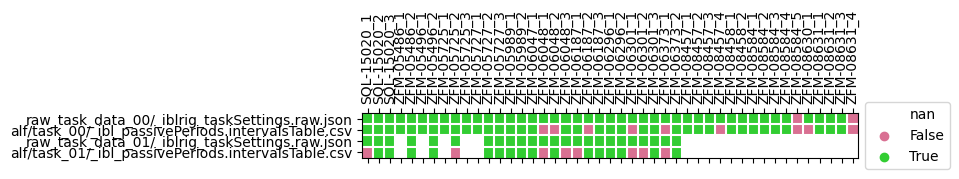

In [25]:
# Check which task datasets exist for each session
qc_columns = qc_datasets['task00'] + qc_datasets['task01']
qcval2num = {np.nan: 0., False: 0.1, True: 1.}
xticklabels = ['subject', 'session_n']
ax = plots.qc_grid(df_sessions, qc_columns, qcval2num=qcval2num, xticklabels=xticklabels)

In [26]:
df_sessions.columns

Index(['LSD_admin', 'alf/probe00/pykilosort/spikes.times.npy',
       'alf/probe01/pykilosort/spikes.times.npy',
       'alf/task_00/_ibl_passivePeriods.intervalsTable.csv',
       'alf/task_01/_ibl_passivePeriods.intervalsTable.csv',
       'alf/task_02/_ibl_passivePeriods.intervalsTable.csv', 'eid', 'lab',
       'n_probes', 'n_tasks', 'number', 'projects',
       'raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec00.ap.cbin',
       'raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec00.sync.npy',
       'raw_ephys_data/probe01/_spikeglx_ephysData_g0_t0.imec01.ap.cbin',
       'raw_ephys_data/probe01/_spikeglx_ephysData_g0_t0.imec01.sync.npy',
       'raw_task_data_00/_iblrig_taskSettings.raw.json',
       'raw_task_data_01/_iblrig_taskSettings.raw.json',
       'raw_task_data_02/_iblrig_taskSettings.raw.json',
       'raw_video_data/_iblrig_bodyCamera.frameData.bin',
       'raw_video_data/_iblrig_bodyCamera.raw.mp4',
       'raw_video_data/_iblrig_leftCamera.frameData.bin',
 

In [27]:
# Check which ephys datasets exist for each session
qc_columns = qc_datasets['probe00'] + qc_datasets['probe01']
qcval2num = {np.nan: 0., False: 0.1, True: 1.}
xticklabels = ['subject', 'session_n']
ax = plots.qc_grid(df_sessions, qc_columns, qcval2num=qcval2num, xticklabels=xticklabels)

KeyError: "['raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.sync.npy', 'raw_ephys_data/probe00/_spikeglx_ephysData_g0_t0.imec0.ap.cbin', 'raw_ephys_data/probe01/_spikeglx_ephysData_g0_t0.imec1.sync.npy', 'raw_ephys_data/probe01/_spikeglx_ephysData_g0_t0.imec1.ap.cbin'] not in index"

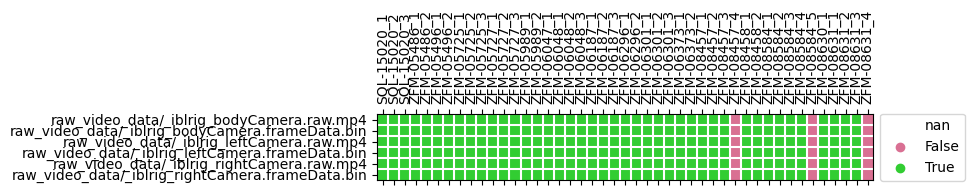

In [11]:
# Check which video datasets exist for each session
qc_columns = qc_datasets['video']
qcval2num = {np.nan: 0., False: 0.1, True: 1.}
xticklabels = ['subject', 'session_n']
ax = plots.qc_grid(df_sessions, qc_columns,  qcval2num=qcval2num, xticklabels=xticklabels)

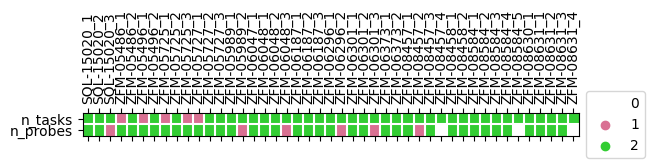

In [12]:
# Check which sessions have the appropriate number of probes and tasks
qc_columns = ['n_tasks', 'n_probes']
qcval2num = {0: 0., 1: 0.1, 2: 1.}
xticklabels = ['subject', 'session_n']
ax = plots.qc_grid(df_sessions, qc_columns=qc_columns, qcval2num=qcval2num, xticklabels=xticklabels)

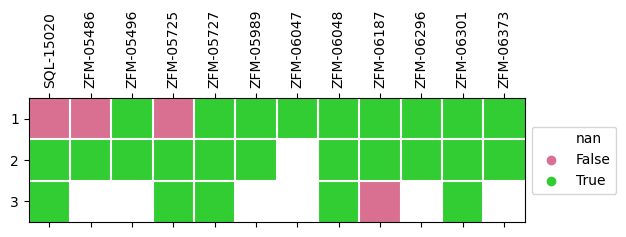

In [18]:
# Check which sessions have all the expected raw data
raw_cols = [col for col in df_sessions.columns if col.startswith('raw')]
df_sessions['data_complete'] = df_sessions.apply(lambda x: x[raw_cols].dropna().all(), axis='columns')
sessions_pivot = df_sessions.pivot(columns='session_n', index='subject', values='data_complete')
sessions_pivot = sessions_pivot.rename_axis(None, axis='columns')
ax = plots.qc_grid(sessions_pivot, qcval2num={np.nan: 0., False: 0.1, True: 1.})
ax.set_xticklabels(sessions_pivot.index)
ax.tick_params(axis='x', rotation=90)

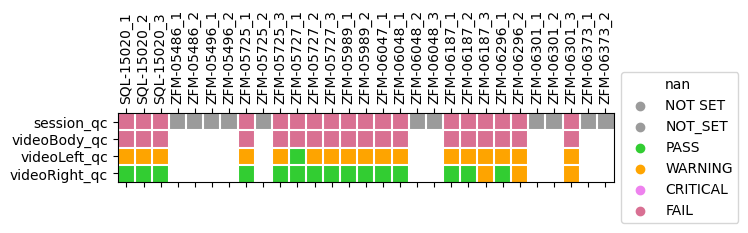

In [19]:
# Plot QC summary for the task and video
qc_columns = ['session_qc', 'videoBody_qc', 'videoLeft_qc', 'videoRight_qc']
xticklabels = ['subject', 'session_n']
ax = plots.qc_grid(df_sessions, qc_columns, xticklabels=xticklabels)

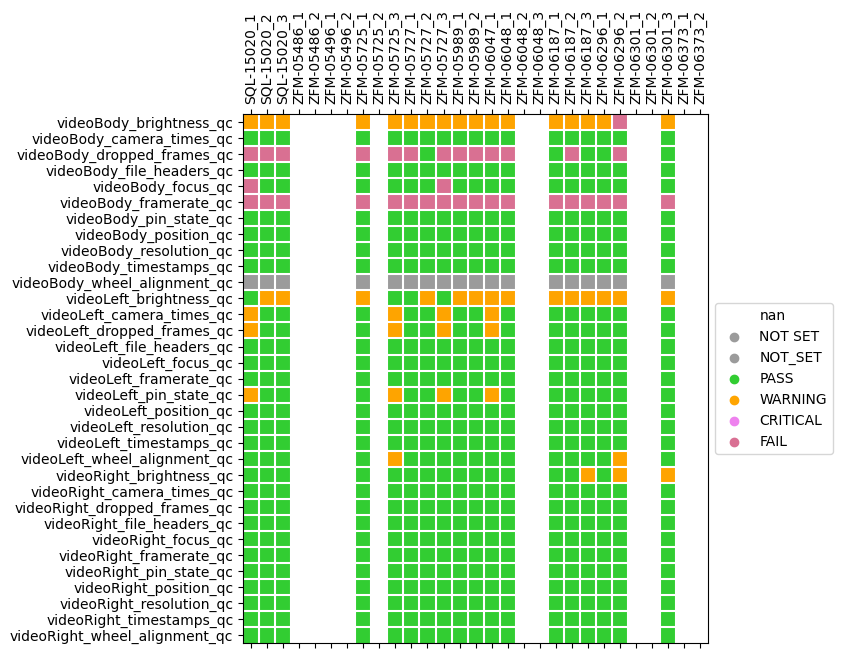

In [20]:
# Plot detailed video QC for each session
fig, ax = plt.subplots(figsize=(6, 8))
qc_columns = [col for col in df_sessions.columns if ('qc' in col) & (col.count('_') > 1)]
xticklabels = ['subject', 'session_n']
ax = plots.qc_grid(df_sessions, qc_columns=qc_columns, ax=ax, xticklabels=xticklabels)

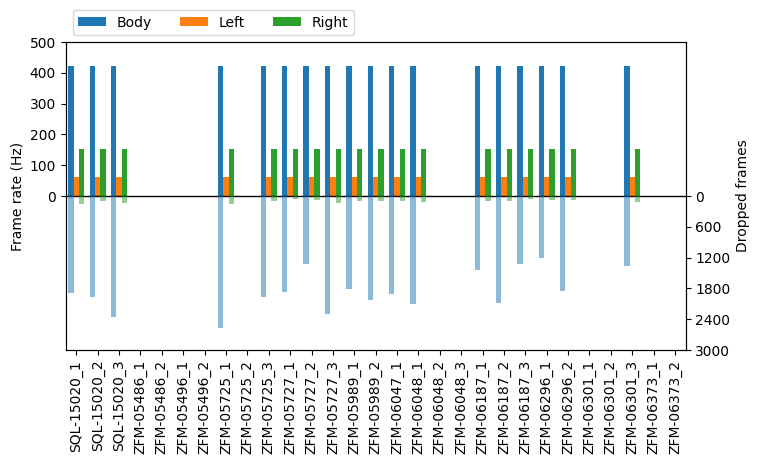

In [21]:
# Plot frame rate and number of dropped frames for each session & camera
fig, ax = plt.subplots(figsize=(8, 4))
ax2 = ax.twinx()

xpos = np.arange(len(df_sessions))

for offset, camera in zip([-0.25, 0., 0.25], ['Body', 'Left', 'Right']):
    framerate = df_sessions[f'video{camera}_framerate']
    ax.bar(xpos + offset, framerate, width=0.25, label=camera)
    dropped_frames = df_sessions[f'video{camera}_dropped_frames']
    ax2.bar(xpos + offset, -1 * dropped_frames, width=0.25, alpha=0.5)

ax.legend(loc='lower left', bbox_to_anchor=(0., 1.), ncol=3)

ax.set_xlim([-0.5, len(df_sessions) - 0.5])
ax.set_ylim([-500, 500])
ax.set_yticks(np.linspace(0, 500, 6))
ax.set_ylabel('Frame rate (Hz)')
ax2.set_ylim([-3000, 3000])
ax2.set_yticks(-1 * np.linspace(0, 3000, 6))
ax2.set_yticklabels(np.linspace(0, 3000, 6).astype(int))
ax2.set_ylabel('Dropped frames')
ax.axhline(0, color='black', lw=1)

ax.set_xticks(np.arange(len(df_sessions)))
ax.set_xticklabels(df_sessions.apply(lambda x: f"{x['subject']}_{x['session_n']}", axis='columns'))
ax.tick_params(axis='x', rotation=90)

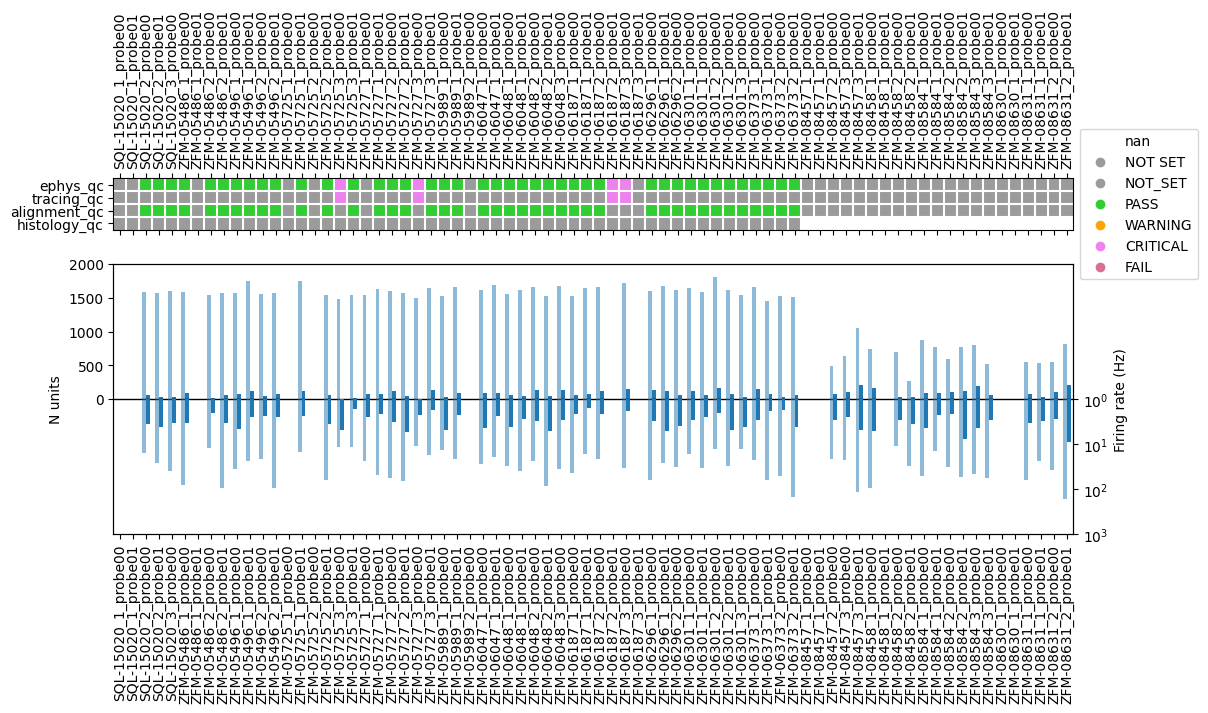

In [26]:
# Plot detailed ephys QC for ech session/probe
fig = plt.figure(figsize=(12, 6))
axs = [
    fig.add_axes([0.1, 0.5, 0.8, 0.3]),
    fig.add_axes([0.1, 0.1, 0.8, 0.45])
]

# Sort by subject
df_insertions = df_insertions.sort_values(['subject', 'session_n', 'probe'])

# QC grid plot
qc_columns = [col for col in df_insertions.columns if col.endswith('_qc')]
xticklabels = ['subject', 'session_n', 'probe']
axs[0] = plots.qc_grid(df_insertions, qc_columns, ax=axs[0], xticklabels=xticklabels)


# Bar plots for N units and firing rates
ax2 = axs[1].twinx()
xpos = np.arange(len(df_insertions))
offests = [-0.15, 0.15]
alphas = [0.5, 1.]
units_cols = ['n_units', 'n_units_qc_pass']
rate_cols = ['firing_rate_max', 'firing_rate_median']
for offset, units_col, rate_col, alpha in zip(offests, units_cols, rate_cols, alphas):
    n_units = df_insertions[units_col]
    axs[1].bar(xpos + offset, n_units, width=0.3, color='C0', alpha=alpha)
    firing_rate = df_insertions[rate_col]
    ax2.bar(xpos + offset, -1 * np.log10(firing_rate),  width=0.3, color='C0', alpha=alpha)
axs[1].set_xlim([-0.5, len(df_insertions) - 0.5])
axs[1].set_ylim([-2000, 2000])
axs[1].set_yticks(np.linspace(0, 2000, 5))
axs[1].set_ylabel('N units')
ax2.set_ylim([-3, 3])
ax2.set_yticks(-1 * np.linspace(0, 3, 4))
ax2.set_yticklabels(f'$10^{tick}$' for tick in np.linspace(0, 3, 4).astype(int))
ax2.set_ylabel('Firing rate (Hz)')
axs[1].axhline(0, color='black', lw=1)
axs[1].set_xticks(np.arange(len(df_insertions)))
axs[1].set_xticklabels(df_insertions.apply(lambda x: f"{x['subject']}_{x['session_n']}_{x['probe']}", axis='columns'))
axs[1].tick_params(axis='x', rotation=90)

Text(0.5, 0, 'Time from LSD administration (min)')

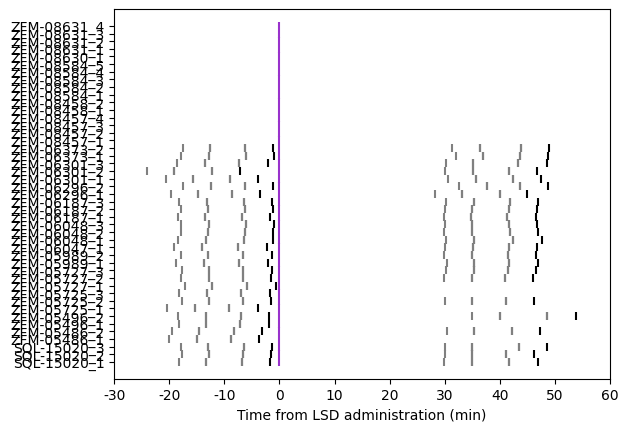

In [11]:
# Plot protocol timings for all sessions
epochs = ['spontaneous', 'rfm', 'replay']
fig, ax = plt.subplots()
for idx, session in df_sessions.iterrows():
    t0 = session['LSD_admin']
    ax.scatter(0, idx, marker='|', color='darkorchid')
    for task in ['task00', 'task01']:
        for epoch in epochs:
            ax.scatter(session[f'{task}_{epoch}_start'] - t0, idx, marker='|', color='gray')
            ax.scatter(session[f'{task}_{epoch}_stop'] - t0, idx, marker='|', color='black')
ax.set_yticks(np.arange(len(df_sessions)))
ax.set_yticklabels(df_sessions.apply(lambda x: f"{x['subject']}_{x['session_n']}", axis='columns'))
ax.set_xticks(np.linspace(-30, 60, 10) * 60)
ax.set_xticklabels(np.linspace(-30, 60, 10).astype(int))
ax.set_xlabel('Time from LSD administration (min)')

# Fetch spike data

In [12]:
# Choose to save unit info
uinfo_file = paths['spikes']  # download spike times and save to file
# uinfo_file = ''  # only fetch cluster info

# Choose to save spike times as well as cluster info
spike_file = paths['spikes']  # download spike times and save to file
# spike_file = ''  # only fetch cluster info

# Download cluster info and spike times from server
df_uinfo = io.fetch_unit_info(one, df_insertions, uinfo_file=uinfo_file, spike_file=spike_file)

  0%|          | 0/78 [00:00<?, ?it/s]

  1%|▏         | 1/78 [00:00<00:23,  3.29it/s]

2025-04-16 18:28:49 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


 19%|█▉        | 15/78 [02:42<13:12, 12.57s/it]local file size mismatch on dataset: mainenlab/Subjects/ZFM-05725/2023-01-31/001/alf/probe00/pykilosort/clusters.metrics.pqt
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-05725/2023-01-31/001/alf/probe00/pykilosort/clusters.metrics.pqt: 100%|██████████| 81.8k/81.8k [00:00<00:00, 113kB/s]
 22%|██▏       | 17/78 [03:02<11:54, 11.71s/it]

2025-04-16 18:31:51 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


 31%|███       | 24/78 [04:25<11:57, 13.28s/it]

2025-04-16 18:33:15 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


 49%|████▊     | 38/78 [06:50<07:52, 11.81s/it]

2025-04-16 18:35:39 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


 51%|█████▏    | 40/78 [06:54<04:11,  6.62s/it]

2025-04-16 18:35:44 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe01/iblsorter/clusters.channels.npy: 100%|██████████| 7.40k/7.40k [00:00<00:00, 17.8kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe01/iblsorter/clusters.depths.npy: 100%|██████████| 3.76k/3.76k [00:00<00:00, 10.2kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe01/iblsorter/clusters.uuids.csv: 100%|██████████| 33.6k/33.6k [00:00<00:00, 74.6kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe01/iblsorter/clusters.metrics.pqt: 100%|██████████| 116k/116k [00:00<00:00, 196kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe01/iblsorter/channels.rawInd.npy: 100%|██████████| 3.20k/3.20k [00:0

2025-04-16 18:38:54 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 148M/148M [00:09<00:00, 14.9MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 37.1M/37.1M [00:05<00:00, 6.20MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe00/iblsorter/clusters.metrics.pqt: 100%|██████████| 131k/131k [00:00<00:00, 196kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe00/iblsorter/clusters.uuids.csv: 100%|██████████| 38.1k/38.1k [00:00<00:00, 110kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe00/iblsorter/clusters.depths.npy: 100%|██████████| 4.24k/4.24k [00:00<00:00,

2025-04-16 18:39:30 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 59.5M/59.5M [00:13<00:00, 4.27MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-11/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 238M/238M [00:14<00:00, 15.9MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-13/001/alf/probe00/iblsorter/clusters.channels.npy: 100%|██████████| 3.99k/3.99k [00:00<00:00, 10.7kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-13/001/alf/probe00/iblsorter/clusters.uuids.csv: 100%|██████████| 17.9k/17.9k [00:00<00:00, 54.3kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-13/001/alf/probe00/iblsorter/clusters.depths.npy: 100%|██████████| 2.06k/2.06k [00:00<0

2025-04-16 18:40:28 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-13/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 24.4M/24.4M [00:04<00:00, 5.22MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-13/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 97.7M/97.7M [00:13<00:00, 7.09MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-18/001/alf/probe00/iblsorter/clusters.uuids.csv: 100%|██████████| 23.6k/23.6k [00:00<00:00, 73.9kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-18/001/alf/probe00/iblsorter/clusters.metrics.pqt: 100%|██████████| 85.5k/85.5k [00:00<00:00, 154kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-18/001/alf/probe00/iblsorter/clusters.depths.npy: 100%|██████████| 2.68k/2.68k [00:00<0

2025-04-16 18:40:59 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-18/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 29.3M/29.3M [00:02<00:00, 10.1MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-18/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 117M/117M [00:24<00:00, 4.87MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-18/001/alf/probe01/iblsorter/clusters.depths.npy: 100%|██████████| 4.35k/4.35k [00:00<00:00, 12.7kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-18/001/alf/probe01/iblsorter/clusters.metrics.pqt: 100%|██████████| 133k/133k [00:00<00:00, 203kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-18/001/alf/probe01/iblsorter/clusters.channels.npy: 100%|██████████| 8.58k/8.58k [00:00<00

2025-04-16 18:41:41 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-18/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 62.9M/62.9M [00:14<00:00, 4.45MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08457/2025-03-18/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 251M/251M [00:24<00:00, 10.2MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-11/001/alf/probe01/iblsorter/clusters.uuids.csv: 100%|██████████| 25.5k/25.5k [00:00<00:00, 37.4kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-11/001/alf/probe01/iblsorter/clusters.metrics.pqt: 100%|██████████| 91.7k/91.7k [00:00<00:00, 165kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-11/001/alf/probe01/iblsorter/clusters.depths.npy: 100%|██████████| 2.88k/2.88k [00:00<00:

2025-04-16 18:42:51 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-11/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 32.9M/32.9M [00:03<00:00, 8.85MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-11/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 132M/132M [00:09<00:00, 13.9MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-11/001/alf/probe00/iblsorter/clusters.metrics.pqt: 100%|██████████| 97.5k/97.5k [00:00<00:00, 134kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-11/001/alf/probe00/iblsorter/clusters.channels.npy: 100%|██████████| 6.05k/6.05k [00:00<00:00, 18.0kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-11/001/alf/probe00/iblsorter/clusters.uuids.csv: 100%|██████████| 27.4k/27.4k [00:00<0

2025-04-16 18:43:21 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-11/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 181M/181M [00:22<00:00, 8.03MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-11/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 45.3M/45.3M [00:24<00:00, 1.82MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-14/001/alf/probe00/iblsorter/clusters.uuids.csv: 100%|██████████| 25.8k/25.8k [00:00<00:00, 50.8kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-14/001/alf/probe00/iblsorter/clusters.channels.npy: 100%|██████████| 5.70k/5.70k [00:00<00:00, 14.9kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-14/001/alf/probe00/iblsorter/clusters.depths.npy: 100%|██████████| 2.91k/2.91k [00:00<0

2025-04-16 18:44:26 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-14/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 20.5M/20.5M [00:04<00:00, 4.54MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-14/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 82.1M/82.1M [00:16<00:00, 4.99MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-14/001/alf/probe01/iblsorter/clusters.channels.npy: 100%|██████████| 2.32k/2.32k [00:00<00:00, 5.11kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-14/001/alf/probe01/iblsorter/clusters.metrics.pqt: 100%|██████████| 44.6k/44.6k [00:00<00:00, 94.6kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-14/001/alf/probe01/iblsorter/clusters.uuids.csv: 100%|██████████| 10.1k/10.1k [00:0

2025-04-16 18:45:02 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-14/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 24.4M/24.4M [00:06<00:00, 3.79MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08458/2025-03-14/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 97.5M/97.5M [00:18<00:00, 5.17MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-12/001/alf/probe00/iblsorter/clusters.metrics.pqt: 100%|██████████| 112k/112k [00:00<00:00, 154kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-12/001/alf/probe00/iblsorter/clusters.channels.npy: 100%|██████████| 7.11k/7.11k [00:00<00:00, 20.2kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-12/001/alf/probe00/iblsorter/clusters.uuids.csv: 100%|██████████| 32.3k/32.3k [00:00<0

2025-04-16 18:45:37 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-12/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 41.3M/41.3M [00:12<00:00, 3.29MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-12/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 165M/165M [00:11<00:00, 14.3MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-12/001/alf/probe01/iblsorter/clusters.depths.npy: 100%|██████████| 3.19k/3.19k [00:00<00:00, 8.98kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-12/001/alf/probe01/iblsorter/clusters.metrics.pqt: 100%|██████████| 100k/100k [00:00<00:00, 131kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-12/001/alf/probe01/iblsorter/clusters.uuids.csv: 100%|██████████| 28.3k/28.3k [00:00<00:00

2025-04-16 18:46:16 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-12/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 27.2M/27.2M [00:03<00:00, 7.50MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-12/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 109M/109M [00:23<00:00, 4.73MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-17/001/alf/probe00/iblsorter/clusters.channels.npy: 100%|██████████| 4.90k/4.90k [00:00<00:00, 14.7kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-17/001/alf/probe00/iblsorter/clusters.metrics.pqt: 100%|██████████| 81.1k/81.1k [00:00<00:00, 118kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-17/001/alf/probe00/iblsorter/clusters.uuids.csv: 100%|██████████| 22.1k/22.1k [00:00<0

2025-04-16 18:46:55 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-17/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 31.5M/31.5M [00:11<00:00, 2.78MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-17/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 126M/126M [00:16<00:00, 7.63MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-17/001/alf/probe01/iblsorter/clusters.depths.npy: 100%|██████████| 3.24k/3.24k [00:00<00:00, 8.96kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-17/001/alf/probe01/iblsorter/clusters.uuids.csv: 100%|██████████| 28.8k/28.8k [00:00<00:00, 51.4kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-17/001/alf/probe01/iblsorter/clusters.metrics.pqt: 100%|██████████| 101k/101k [00:00<00:0

2025-04-16 18:47:35 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-17/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 55.5M/55.5M [00:12<00:00, 4.27MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-17/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 222M/222M [00:15<00:00, 14.3MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-19/001/alf/probe01/iblsorter/clusters.channels.npy: 100%|██████████| 4.26k/4.26k [00:00<00:00, 11.4kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-19/001/alf/probe01/iblsorter/clusters.depths.npy: 100%|██████████| 2.20k/2.20k [00:00<00:00, 6.02kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-19/001/alf/probe01/iblsorter/clusters.metrics.pqt: 100%|██████████| 71.2k/71.2k [00:00

2025-04-16 18:48:21 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-19/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 20.8M/20.8M [00:10<00:00, 1.93MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-19/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 83.4M/83.4M [00:09<00:00, 8.41MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-19/001/alf/probe00/iblsorter/clusters.uuids.csv: 100%|██████████| 29.8k/29.8k [00:00<00:00, 59.9kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-19/001/alf/probe00/iblsorter/clusters.depths.npy: 100%|██████████| 3.35k/3.35k [00:00<00:00, 9.11kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-19/001/alf/probe00/iblsorter/clusters.channels.npy: 100%|██████████| 6.58k/6.58k [00:00

2025-04-16 18:48:52 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-19/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 53.5M/53.5M [00:04<00:00, 10.9MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-19/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 214M/214M [00:15<00:00, 13.5MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-21/001/alf/probe01/iblsorter/clusters.depths.npy: 100%|██████████| 2.99k/2.99k [00:00<00:00, 8.97kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-21/001/alf/probe01/iblsorter/clusters.channels.npy: 100%|██████████| 5.85k/5.85k [00:00<00:00, 15.8kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-21/001/alf/probe01/iblsorter/clusters.metrics.pqt: 100%|██████████| 95.1k/95.1k [00:00

2025-04-16 18:49:30 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-21/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 202M/202M [00:22<00:00, 9.00MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-21/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 50.6M/50.6M [00:18<00:00, 2.73MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-21/001/alf/probe00/iblsorter/clusters.metrics.pqt: 100%|██████████| 73.5k/73.5k [00:00<00:00, 107kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-21/001/alf/probe00/iblsorter/clusters.channels.npy: 100%|██████████| 4.36k/4.36k [00:00<00:00, 13.0kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-21/001/alf/probe00/iblsorter/clusters.depths.npy: 100%|██████████| 2.24k/2.24k [00:00<

2025-04-16 18:50:27 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-21/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 126M/126M [00:21<00:00, 5.98MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08584/2025-03-21/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 31.5M/31.5M [00:07<00:00, 4.04MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08630/2025-03-04/001/alf/probe01/iblsorter/clusters.metrics.pqt: 100%|██████████| 49.5k/49.5k [00:00<00:00, 96.8kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08630/2025-03-04/001/alf/probe01/iblsorter/clusters.depths.npy: 100%|██████████| 1.43k/1.43k [00:00<00:00, 3.74kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08630/2025-03-04/001/alf/probe01/iblsorter/clusters.uuids.csv: 100%|██████████| 12.0k/12.0k [00:00<00

2025-04-16 18:51:07 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08630/2025-03-04/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 10.2M/10.2M [00:03<00:00, 3.21MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08630/2025-03-04/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 40.9M/40.9M [00:04<00:00, 9.14MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08630/2025-03-04/001/alf/probe00/iblsorter/clusters.metrics.pqt: 100%|██████████| 65.1k/65.1k [00:00<00:00, 137kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08630/2025-03-04/001/alf/probe00/iblsorter/clusters.uuids.csv: 100%|██████████| 17.4k/17.4k [00:00<00:00, 53.3kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08630/2025-03-04/001/alf/probe00/iblsorter/clusters.channels.npy: 100%|██████████| 3.90k/3.90k [00:00

2025-04-16 18:51:23 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08630/2025-03-04/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 39.4M/39.4M [00:17<00:00, 2.30MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08630/2025-03-04/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 9.84M/9.84M [00:03<00:00, 2.48MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-12/001/alf/probe01/iblsorter/clusters.metrics.pqt: 100%|██████████| 74.4k/74.4k [00:00<00:00, 132kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-12/001/alf/probe01/iblsorter/clusters.uuids.csv: 100%|██████████| 19.9k/19.9k [00:00<00:00, 56.1kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-12/001/alf/probe01/iblsorter/clusters.channels.npy: 100%|██████████| 4.42k/4.42k [00:00

2025-04-16 18:51:52 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-12/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 115M/115M [00:08<00:00, 14.0MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-12/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 28.6M/28.6M [00:05<00:00, 4.92MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-12/001/alf/probe00/iblsorter/clusters.metrics.pqt: 100%|██████████| 74.4k/74.4k [00:00<00:00, 101kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-12/001/alf/probe00/iblsorter/clusters.depths.npy: 100%|██████████| 2.30k/2.30k [00:00<00:00, 6.58kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-12/001/alf/probe00/iblsorter/clusters.uuids.csv: 100%|██████████| 20.1k/20.1k [00:00<00:

2025-04-16 18:52:18 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-12/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 39.8M/39.8M [00:06<00:00, 5.79MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-12/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 159M/159M [00:15<00:00, 10.5MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-18/001/alf/probe01/iblsorter/clusters.depths.npy: 100%|██████████| 3.38k/3.38k [00:00<00:00, 9.33kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-18/001/alf/probe01/iblsorter/clusters.uuids.csv: 100%|██████████| 30.0k/30.0k [00:00<00:00, 63.6kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-18/001/alf/probe01/iblsorter/clusters.channels.npy: 100%|██████████| 6.62k/6.62k [00:00<0

2025-04-16 18:52:57 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-18/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 312M/312M [00:24<00:00, 12.8MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-18/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 78.0M/78.0M [00:11<00:00, 6.81MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-18/001/alf/probe00/iblsorter/clusters.uuids.csv: 100%|██████████| 20.2k/20.2k [00:00<00:00, 55.6kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-18/001/alf/probe00/iblsorter/clusters.channels.npy: 100%|██████████| 4.49k/4.49k [00:00<00:00, 12.2kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-18/001/alf/probe00/iblsorter/clusters.metrics.pqt: 100%|██████████| 75.2k/75.2k [00:00<

2025-04-16 18:53:55 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-18/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 28.3M/28.3M [00:04<00:00, 6.87MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-18/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 113M/113M [00:22<00:00, 5.12MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-21/001/alf/probe00/iblsorter/clusters.channels.npy: 100%|██████████| 7.09k/7.09k [00:00<00:00, 18.5kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-21/001/alf/probe00/iblsorter/clusters.metrics.pqt: 100%|██████████| 112k/112k [00:00<00:00, 170kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-21/001/alf/probe00/iblsorter/clusters.depths.npy: 100%|██████████| 3.61k/3.61k [00:00<00

2025-04-16 18:54:33 WARNING  one.py:359  Histology tracing for probe00 does not exist. No channels for probe00


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-21/001/alf/probe00/iblsorter/spikes.times.npy: 100%|██████████| 262M/262M [00:24<00:00, 10.9MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-21/001/alf/probe00/iblsorter/spikes.clusters.npy: 100%|██████████| 65.6M/65.6M [00:12<00:00, 5.39MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-21/001/alf/probe01/iblsorter/clusters.metrics.pqt: 100%|██████████| 111k/111k [00:00<00:00, 163kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-21/001/alf/probe01/iblsorter/clusters.depths.npy: 100%|██████████| 3.58k/3.58k [00:00<00:00, 10.5kB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-21/001/alf/probe01/iblsorter/clusters.uuids.csv: 100%|██████████| 32.0k/32.0k [00:00<00:00

2025-04-16 18:55:30 WARNING  one.py:359  Histology tracing for probe01 does not exist. No channels for probe01


(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-21/001/alf/probe01/iblsorter/spikes.times.npy: 100%|██████████| 135M/135M [00:17<00:00, 7.78MB/s]
(S3) /home/openlab/Downloads/ONE/alyx.internationalbrainlab.org/mainenlab/Subjects/ZFM-08631/2025-03-21/001/alf/probe01/iblsorter/spikes.clusters.npy: 100%|██████████| 33.8M/33.8M [00:13<00:00, 2.53MB/s]
100%|██████████| 78/78 [27:22<00:00, 21.05s/it]


In [17]:
# Load cluster info from file
df_uinfo = pd.read_parquet(paths['units']).query('ks2_label =="good"')

In [18]:
df_uinfo['region'] = df_uinfo['region'].replace({np.nan: 'none'})

coarse_regions = atlas.combine_regions(df_uinfo['region'])
region_counts = df_uinfo.groupby('region').apply(len).sort_values(ascending=False)

/tmp/ipykernel_7963/646894758.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  region_counts = df_uinfo.groupby('region').apply(len).sort_values(ascending=False)


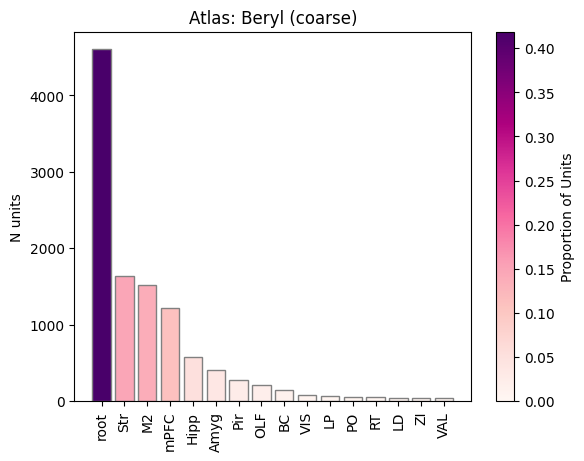

In [24]:
fig, ax = plt.subplots()
ax.set_title('Atlas: Beryl (coarse)')
cmap = cmaps['n_units']

region_names, counts = np.unique(coarse_regions, return_counts=True)
sorted_inds = np.argsort(-1 * counts)
props = counts / counts.sum()
colors = np.array([cmap(p) for p in props / props.max()])

ax.bar(np.arange(len(counts)), counts[sorted_inds], fc=colors[sorted_inds], ec='gray')
ax.tick_params(axis='x', rotation=90)
ax.set_xticks(np.arange(len(counts)))
ax.set_xticklabels(region_names[sorted_inds])
ax.set_ylabel('N units')

mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, props.max()), cmap=cmap)
cbar = fig.colorbar(mappable, ax=ax, label='Proportion of Units')

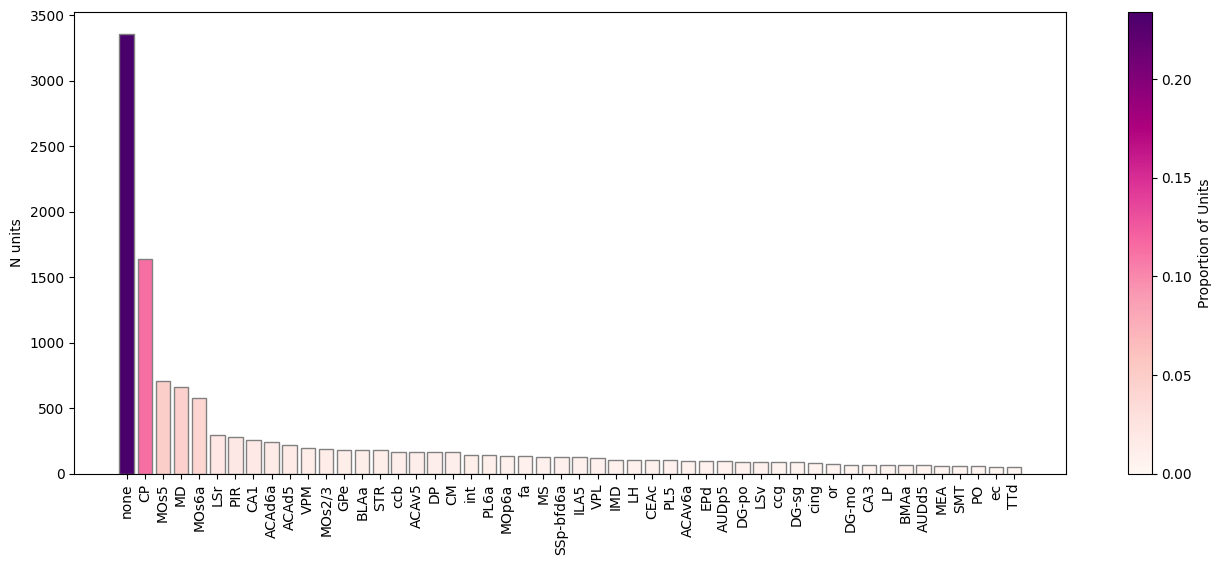

In [20]:
fig, ax = plt.subplots(figsize=(16, 6))
cmap = cmaps['n_units']
n_regions = 50

props = region_counts / region_counts.sum()
colors = np.array([cmap(p) for p in props / props.max()])

ax.bar(np.arange(n_regions), region_counts[:n_regions], fc=colors[:n_regions], ec='gray')
ax.set_xticks(np.arange(n_regions))
ax.set_xticklabels(region_counts[:n_regions].index)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('N units')

mappable = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, props.max()), cmap=cmap)
cbar = fig.colorbar(mappable, ax=ax, label='Proportion of Units')

In [27]:
# Plot distribution of units across brain regions
from iblutil.numerical import ismember
from iblatlas.atlas import AllenAtlas, BrainRegions
import iblatlas.plots as anatomyplots
atlas = AllenAtlas(res_um=50)
regions = BrainRegions()
from psyfun.config import ap_coords

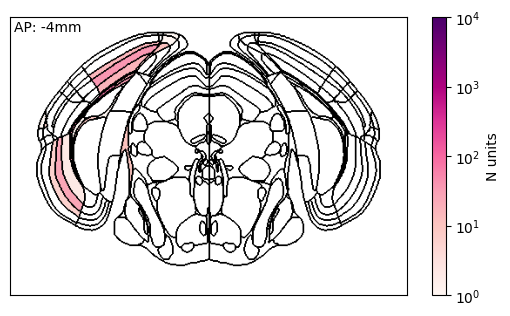

In [34]:
# for ap_coord in ap_coords:
ap_coord = ap_coords[6]
fig, ax, cbar = anatomyplots.plot_scalar_on_slice(
    region_counts.index, 
    np.log10(region_counts.values),
    coord=ap_coord * 1000,  # in um
    background='boundary',
    atlas=atlas,
    clevels=[0, 4],
    cmap=cmap,
    show_cbar=True,
)
ax.text(0.01, 0.95, f'AP: {ap_coord}mm', transform=ax.transAxes)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax_pos = ax.get_position()  # returns [left, bottom, width, height]
cbar_pos = cbar.ax.get_position()
cbar.ax.set_position([cbar_pos.x0, ax_pos.y0, cbar_pos.width, ax_pos.height])
cbar.set_ticks(np.linspace(0, 4, 5))
cbar.set_ticklabels(['$10^{%d}$' % tick for tick in np.linspace(0, 4, 5)])
cbar.set_label('N units')

In [9]:
## TODO: normalize contribution of units by volume of region

# Control data

In [25]:
df_bwm = io.fetch_BWM_task_starts(one)

100%|███████████████████████████████████████| 1068/1068 [02:23<00:00,  7.45it/s]


In [134]:
df_bwm = pd.read_csv('metadata/BWM_task_starts.csv')

Sessions with pre-task period > 5.00min: 26


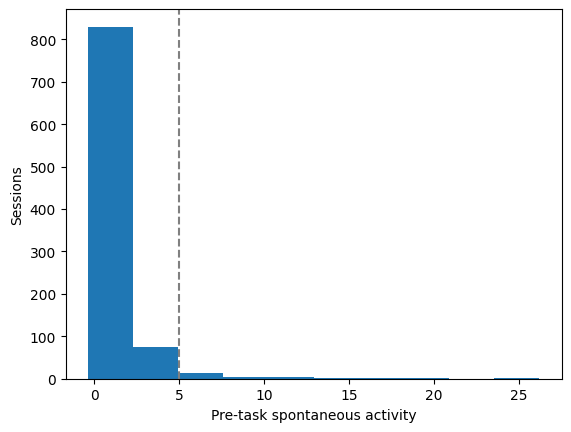

In [135]:
cutoff = 300 

fig, ax = plt.subplots()
ax.hist(df_bwm['task_start'] / 60)
ax.axvline(cutoff / 60, ls='--', color='gray')
ax.set_ylabel('Sessions')
ax.set_xlabel('Pre-task spontaneous activity')

df_controls = df_bwm.query('task_start > @cutoff')
print(f'Sessions with pre-task period > {cutoff / 60:.2f}min: {len(df_controls)}')

In [5]:
df_insertions_bwm = io.fetch_BWM_insertions(one, df_controls)

100%|██████████████████████████████████████████| 49/49 [00:00<00:00, 681.65it/s]


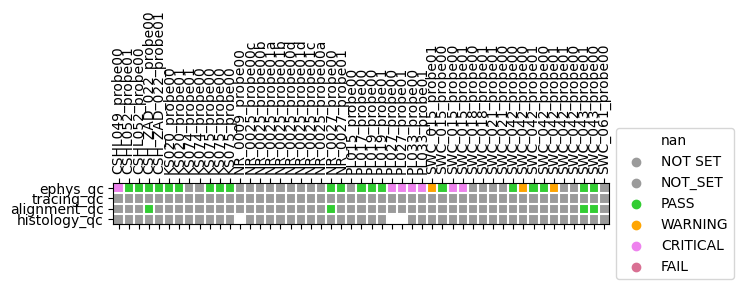

In [6]:
# QC grid plot
qc_columns = [col for col in df_insertions_bwm.columns if col.endswith('_qc')]
xticklabels = ['subject', 'probe']
ax = plots.qc_grid(df_insertions_bwm, qc_columns, xticklabels=xticklabels)

In [5]:
df_insertions_bwm = pd.read_csv(paths['BWM_insertions'])

In [10]:
len(df_insertions_bwm['eid'].unique())

26

In [4]:
df_uinfo = io.fetch_unit_info(one, df_insertions_bwm, uinfo_file=paths['BWM_units'], spike_file=paths['BWM_spikes'])

  0%|                                                    | 0/49 [00:00<?, ?it/s]

alf/probe00



  2%|▉                                           | 1/49 [00:05<04:43,  5.91s/it]

alf/probe01/pykilosort



100%|███████████████████████████████████████| 1031/1031 [00:36<00:00, 28.61it/s]


alf/probe01



  4%|█▊                                          | 2/49 [01:01<27:25, 35.00s/it]

alf/probe00/pykilosort



100%|█████████████████████████████████████████| 771/771 [00:29<00:00, 26.30it/s]


alf/probe00



  6%|██▋                                         | 3/49 [01:41<28:45, 37.52s/it]

alf/probe00/pykilosort



100%|█████████████████████████████████████████| 763/763 [00:31<00:00, 24.27it/s]


alf/probe00



  8%|███▌                                        | 4/49 [02:32<32:10, 42.91s/it]

alf/probe01/pykilosort



 10%|████▍                                       | 5/49 [03:23<33:31, 45.71s/it]

alf/probe00/pykilosort



100%|█████████████████████████████████████████| 309/309 [00:26<00:00, 11.72it/s]


alf/probe00



 12%|█████▍                                      | 6/49 [03:56<29:42, 41.46s/it]

alf/probe01



100%|█████████████████████████████████████████| 827/827 [00:08<00:00, 93.92it/s]


alf/probe01/pykilosort



 14%|██████▎                                     | 7/49 [04:17<24:11, 34.55s/it]

alf/probe01/pykilosort



 16%|███████▏                                    | 8/49 [04:37<20:34, 30.12s/it]

alf/probe00/pykilosort



 18%|████████                                    | 9/49 [04:41<14:33, 21.83s/it]/home/crombie/miniconda3/envs/iblenv/lib/python3.10/site-packages/one/util.py:428: ALFWarning: Multiple revisions: "", "2023-04-05"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


alf/probe00/pykilosort



 20%|████████▊                                  | 10/49 [04:47<10:56, 16.84s/it]

alf/probe00/pykilosort



 22%|█████████▋                                 | 11/49 [04:51<08:18, 13.11s/it]

alf/probe00/pykilosort



 24%|██████████▌                                | 12/49 [04:58<06:58, 11.31s/it]local file size mismatch on dataset: steinmetzlab/Subjects/NR_0009/2021-08-11/002/alf/probe00/pykilosort/clusters.uuids.csv

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub


alf/probe00/pykilosort



 27%|███████████▍                               | 13/49 [05:04<05:44,  9.58s/it]local file size mismatch on dataset: steinmetzlab/Subjects/NR_0025/2023-03-29/001/alf/probe00c/pykilosort/clusters.uuids.csv
local file size mismatch on dataset: steinmetzlab/Subjects/NR_0025/2023-03-29/001/alf/probe00c/pykilosort/clusters.depths.npy
local file size mismatch on dataset: steinmetzlab/Subjects/NR_0025/2023-03-29/001/alf/probe00c/pykilosort/clusters.metrics.pqt
local file size mismatch on dataset: steinmetzlab/Subjects/NR_0025/2023-03-29/001/alf/probe00c/pykilosort/clusters.channels.npy

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) 

alf/probe00c/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloa

alf/probe00b/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub

 31%|█████████████▏                             | 15/49 [05:28<05:59, 10.58s/it]local file size mismatch on dataset: steinmetzlab/Subjects/NR_0025/2023-03-29/001/alf/probe01a/pykilosort/c

alf/probe01a/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Download

alf/probe01b/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Download

alf/probe00d/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Download

alf/probe01d/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloa

alf/probe01c/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Download

alf/probe00a/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/steinmetzlab/Sub
(S3) /home/crombie/Download

alf/probe00/pykilosort



 45%|███████████████████▎                       | 22/49 [07:16<09:05, 20.19s/it]

alf/probe01/pykilosort



 47%|████████████████████▏                      | 23/49 [07:59<11:42, 27.01s/it]local file size mismatch on dataset: hausserlab/Subjects/PL015/2022-07-26/004/alf/probe00/pykilosort/clusters.metrics.pqt
local file size mismatch on dataset: hausserlab/Subjects/PL015/2022-07-26/004/alf/probe00/pykilosort/clusters.depths.npy
local file size mismatch on dataset: hausserlab/Subjects/PL015/2022-07-26/004/alf/probe00/pykilosort/clusters.channels.npy
local file size mismatch on dataset: hausserlab/Subjects/PL015/2022-07-26/004/alf/probe00/pykilosort/clusters.uuids.csv

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downlo

alf/probe00/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Download

alf/probe00/pykilosort



 51%|█████████████████████▉                     | 25/49 [08:53<11:13, 28.07s/it]

alf/probe00/pykilosort



 53%|██████████████████████▊                    | 26/49 [08:58<08:04, 21.06s/it]

alf/probe01/pykilosort



 55%|███████████████████████▋                   | 27/49 [09:00<05:38, 15.38s/it]local file size mismatch on dataset: hausserlab/Subjects/PL027/2022-10-28/001/alf/probe00/pykilosort/clusters.channels.npy
local file size mismatch on dataset: hausserlab/Subjects/PL027/2022-10-28/001/alf/probe00/pykilosort/clusters.uuids.csv
local file size mismatch on dataset: hausserlab/Subjects/PL027/2022-10-28/001/alf/probe00/pykilosort/clusters.metrics.pqt
local file size mismatch on dataset: hausserlab/Subjects/PL027/2022-10-28/001/alf/probe00/pykilosort/clusters.depths.npy

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downlo

alf/probe00/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Download

alf/probe01/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje

(S3) /home/crombie/Downloa

alf/probe00/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Download

alf/probe01/pykilosort



(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje
(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/hausserlab/Subje

(S3) /home/crombie/Downloa

alf/probe01



100%|███████████████████████████████████████| 206/206 [00:00<00:00, 1062.94it/s]


alf/probe01/pykilosort



 65%|████████████████████████████               | 32/49 [09:59<03:10, 11.19s/it]

alf/probe00/pykilosort



100%|█████████████████████████████████████████| 381/381 [00:04<00:00, 84.47it/s]


alf/probe00



 67%|████████████████████████████▉              | 33/49 [10:08<02:52, 10.75s/it]

alf/probe00/pykilosort



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 157.82it/s]


alf/probe00



 69%|█████████████████████████████▊             | 34/49 [10:17<02:33, 10.22s/it]

alf/probe01



100%|████████████████████████████████████████| 290/290 [00:00<00:00, 501.03it/s]


alf/probe01/pykilosort



 71%|██████████████████████████████▋            | 35/49 [10:21<01:57,  8.40s/it]

alf/probe00/pykilosort



100%|██████████████████████████████████████████| 63/63 [00:00<00:00, 148.05it/s]


alf/probe00



 73%|███████████████████████████████▌           | 36/49 [10:28<01:43,  7.97s/it]

alf/probe01/pykilosort



100%|█████████████████████████████████████████| 341/341 [00:04<00:00, 72.95it/s]


alf/probe01



 76%|████████████████████████████████▍          | 37/49 [10:37<01:38,  8.17s/it]

alf/probe01



100%|██████████████████████████████████████████| 82/82 [00:00<00:00, 998.49it/s]


alf/probe01/pykilosort



 78%|█████████████████████████████████▎         | 38/49 [10:43<01:21,  7.40s/it]

alf/probe00



100%|████████████████████████████████████████| 176/176 [00:00<00:00, 992.09it/s]


alf/probe00/pykilosort



 80%|██████████████████████████████████▏        | 39/49 [10:46<01:01,  6.15s/it]

alf/probe00



100%|██████████████████████████████████████| 1370/1370 [00:06<00:00, 226.00it/s]


alf/probe00/pykilosort



 82%|███████████████████████████████████        | 40/49 [11:47<03:23, 22.64s/it]

alf/probe00



100%|████████████████████████████████████████| 150/150 [00:00<00:00, 217.75it/s]


alf/probe00/pykilosort



 84%|███████████████████████████████████▉       | 41/49 [11:54<02:24, 18.02s/it]

alf/probe01



100%|██████████████████████████████████████████| 91/91 [00:00<00:00, 256.51it/s]


alf/probe01/pykilosort



 86%|████████████████████████████████████▊      | 42/49 [11:57<01:34, 13.56s/it]

alf/probe00/pykilosort



100%|█████████████████████████████████████████| 479/479 [00:05<00:00, 81.48it/s]


alf/probe00



 88%|█████████████████████████████████████▋     | 43/49 [12:16<01:30, 15.16s/it]/home/crombie/miniconda3/envs/iblenv/lib/python3.10/site-packages/one/util.py:428: ALFWarning: Multiple revisions: "", "2023-04-05"
  warnings.warn(f'Multiple revisions: {rev_list}', alferr.ALFWarning)


alf/probe01



100%|████████████████████████████████████████| 258/258 [00:00<00:00, 299.47it/s]


alf/probe01/pykilosort



 90%|██████████████████████████████████████▌    | 44/49 [12:21<01:00, 12.08s/it]

alf/probe01



100%|████████████████████████████████████████| 226/226 [00:01<00:00, 169.41it/s]


alf/probe01/pykilosort



 92%|███████████████████████████████████████▍   | 45/49 [12:30<00:44, 11.02s/it]

alf/probe00/pykilosort



 94%|████████████████████████████████████████▎  | 46/49 [12:50<00:41, 13.74s/it]

alf/probe01/pykilosort



100%|███████████████████████████████████████| 1542/1542 [00:31<00:00, 48.61it/s]


alf/probe01/ks2_preproc_tests



100%|██████████████████████████████████████| 1542/1542 [00:09<00:00, 155.16it/s]


alf/probe01



 96%|█████████████████████████████████████████▏ | 47/49 [13:56<00:58, 29.43s/it]

alf/probe00/pykilosort



100%|█████████████████████████████████████████| 819/819 [00:15<00:00, 52.68it/s]


alf/probe00



 98%|██████████████████████████████████████████ | 48/49 [14:20<00:27, 27.91s/it]

alf/probe00/pykilosort



100%|█████████████████████████████████████████| 361/361 [00:32<00:00, 11.18it/s]


alf/probe00



100%|███████████████████████████████████████████| 49/49 [15:05<00:00, 18.49s/it]


In [8]:
df_uinfo_bwm = pd.read_parquet(paths['BWM_units'])

In [9]:
len(df_uinfo_bwm)

21456

In [149]:
## TODO: check if e.g. intervals table dataset exists
## TODO: ask Olivier to re-extract old task data
for eif in df_uinfo_bwm['eid'].unique():
    details = one.get_details(eid)
    print(details['task_protocol'])

_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5
_iblrig_tasks_ephysChoiceWorld6.2.5


In [152]:
task_settings = one.load_dataset(eid, '_iblrig_taskSettings.raw.json')

(S3) /home/crombie/Downloads/ONE/alyx.internationalbrainlab.org/churchlandlab/Subjects/CSHL049/2020-01-12/003/raw_behavior_data/_iblrig_taskSettings.raw.json: 100%|█
